In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import ujson as json

import torch


from tqdm import tqdm
import numpy as np
from safetensors import safe_open
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
# Set font globally to Times New Roman
plt.rcParams['font.family'] = 'DejaVu Serif'
fontsize = 19

In [2]:
with open("/cm/archive/anonymous_new/revise_checkpoints/Xphi35-siglip224/SMOE/665K36/analysts/entropy/0722_0217_llava_v1.5_mme_llava_model_args_3775f6/mme.json", "r") as f:
    data = json.load(f)

In [3]:
data_paths = glob.glob("/cm/archive/anonymous_new/revise_checkpoints/Xphi35-siglip224/SMOE/665K36/analysts/entropy/*")

In [4]:
path  = "/cm/archive/anonymous_new/revise_checkpoints/Xphi35-siglip224/SMOE/665K36/analysts/entropy/0722_0217_llava_v1.5_mme_llava_model_args_3775f6"
path

'/cm/archive/anonymous_new/revise_checkpoints/Xphi35-siglip224/SMOE/665K36/analysts/entropy/0722_0217_llava_v1.5_mme_llava_model_args_3775f6'

In [5]:
if os.path.exists(f"{path}/mme.json") == False: continue

SyntaxError: 'continue' not properly in loop (3597875779.py, line 1)

In [6]:
path_result = f"{path}/mme.json"
with open(path_result, "r") as f:
    mme = json.load(f)
cag = mme['logs'][0]['doc']['category']

In [7]:
with open(f"{path}/results.json", "r") as f:
    result_logs = json.load(f)
name_method = result_logs['model_configs']['model_args'].split("/")[-1].split(",")[0]
name_method

'Full_smoe'

In [8]:
result_logs['model_configs']['model_args'].split("/")[-1].split(",")[0]

'Full_smoe'

In [9]:
entropy_data_subtasks_clip_siglip['siglip'][name_method] = 

SyntaxError: invalid syntax (2542677226.py, line 1)

In [10]:
mme['logs'][1]['logs_metrics_vision'][0][0]

{'time_inference': 0.1392819881439209,
 '0': {'entropy_weight_topk': 0.9985502362251282,
  'entropy_weight_all': 0.9973273873329163,
  'dist_experts_top1': [1038, 39, 81, 93, 900, 153],
  'dist_experts_top2': [2128, 762, 759, 459, 1767, 1037],
  'balance_loss': 1.057348370552063,
  'router_z_loss': 3.044921875},
 '1': {'entropy_weight_topk': 0.9967339038848877,
  'entropy_weight_all': 0.9936237335205078,
  'dist_experts_top1': [144, 505, 626, 492, 157, 380],
  'dist_experts_top2': [1139, 1049, 1260, 1411, 880, 1173],
  'balance_loss': 1.030631422996521,
  'router_z_loss': 2.193359375},
 '2': {'entropy_weight_topk': 0.9946058392524719,
  'entropy_weight_all': 0.9902464747428894,
  'dist_experts_top1': [236, 428, 370, 520, 215, 535],
  'dist_experts_top2': [1223, 1246, 1057, 1715, 801, 870],
  'balance_loss': 1.02817702293396,
  'router_z_loss': 1.2177734375},
 '3': {'entropy_weight_topk': 0.9941797256469727,
  'entropy_weight_all': 0.9860889911651611,
  'dist_experts_top1': [446, 531, 2

In [11]:
id_layers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26']

In [12]:
def compute_entropy_topk_np(weight_experts):
    """
    weight_experts : array-like of shape (B, N, K)
        B – batch size, N – số expert, K – top-k weight.
    Trả về: entropy chuẩn hóa (scalar) trung bình trên batch.
    """

    # Bảo đảm kiểu float
    weight_experts = np.asarray(weight_experts, dtype=np.float64)

    # 1. Chuẩn hóa thành xác suất
    probs = weight_experts / weight_experts.sum(axis=-1, keepdims=True)

    # 2. Entropy từng mẫu
    entropy = -np.sum(probs * np.log(probs + 1e-9), axis=-1)   # tránh log(0)
    try:
        # 3. Chuẩn hóa để so sánh giữa vector có K khác nhau
        K = weight_experts.shape[-1]
    except:
        print(weight_experts.shape)
        print(weight_experts)
        assert False, "Error"
    entropy_norm = entropy / np.log(K)
    # 4. Lấy trung bình trên batch
    return entropy_norm.mean()

In [13]:
num_experts = mme['logs'][1]['logs_metrics_vision'][0][0]

In [14]:
compute_entropy_topk_np(mme['logs'][1]['logs_metrics_vision'][0][0]['0']['dist_experts_top1'])

0.6824641449203354

In [15]:
mme['logs'][1]['logs_metrics_vision'][0][0]['0']['dist_experts_top1']

[1038, 39, 81, 93, 900, 153]

In [16]:
infor_scores = []
mme = mme['logs'][1]['logs_metrics_vision'][0][0]['0']['dist_experts_top1']
for k in id_layers:
    infor_scores.append(com)
    
    

NameError: name 'com' is not defined

In [17]:
id_layers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26']
entropy_data_subtasks_clip_siglip = {'siglip': {}}

for path in data_paths:
    if not os.path.exists(f"{path}/mme.json"):
        continue

    # --- Đọc MME log ---
    with open(f"{path}/mme.json") as f:
        mme_results = json.load(f)
       # category

    # --- Đọc config để lấy tên mô hình ---
    with open(f"{path}/results.json") as f:
        result_logs = json.load(f)
    name_method = result_logs['model_configs']['model_args']\
                      .split("/")[-1].split(",")[0]

    # --- Tính entropy ---
    score_entropy = {}
    counts = {}
    for mme in mme_results['logs']:
        cag = mme['doc']['category']
        layer_scores = []

        for k in id_layers:
            score = compute_entropy_topk_np(
                mme['logs_metrics_vision'][0][0][k]['dist_experts_top1']
            )
            layer_scores.append(score)

        layer_scores = np.asarray(layer_scores)        # chuyển sang np.array

        if cag not in score_entropy:
            score_entropy[cag] = layer_scores
            counts[cag] = 0
        else:
            score_entropy[cag] += layer_scores
        counts[cag] +=1
    # --- Lưu vào dict, tránh overwrite ---
    task_dict = entropy_data_subtasks_clip_siglip.setdefault('siglip', {})
    method_dict = task_dict.setdefault(name_method, {})
    for c in score_entropy.keys():
        score_entropy[c] /= counts[c]
        method_dict[c] = score_entropy[c].tolist()


In [18]:
len(mme['logs'])

KeyError: 'logs'

In [ ]:
entropy_data_subtasks_clip_siglip

{'siglip': {'Full_smoe_tcmoe': {'code_reasoning': [0.5092048429091246,
    0.5370458563635497,
    0.5656918630254892,
    0.6288775188314011,
    0.5661245423297634,
    0.5969860307939955,
    0.6213998729262761,
    0.6157152669772719,
    0.5937325903063406,
    0.6224080005159627,
    0.6253525280912009,
    0.636054485437027,
    0.6332808576079644,
    0.646156798224814,
    0.656350452748937,
    0.6753511157414762,
    0.6663204927555388,
    0.6848235782751313,
    0.7436632249193269,
    0.7291093758740315,
    0.7345581341019676,
    0.7011995596717557,
    0.7058516468547432,
    0.6460377466011138,
    0.6544444466641159,
    0.6484099209588964,
    0.7303855831596374],
   'artwork': [0.4943188216817262,
    0.549588732089737,
    0.6315490069980296,
    0.6479744889261173,
    0.623364182935845,
    0.6294412468261749,
    0.6437987753599275,
    0.6461870462899876,
    0.6457794707899791,
    0.6456574040375728,
    0.6415829569881507,
    0.6471713440124887,
    0.6443

In [19]:

# Sample entropy data for Clip and Siglip across methods and domains (subtasks)
domains = list(entropy_data_subtasks_clip_siglip['siglip']['Full_smoe'].keys())
domains

['code_reasoning',
 'artwork',
 'celebrity',
 'numerical_calculation',
 'text_translation',
 'count',
 'color',
 'commonsense_reasoning',
 'position',
 'OCR',
 'landmark',
 'scene',
 'existence',
 'posters']

In [20]:
data_clipsiglip = {}
for vision_encoder in entropy_data_subtasks_clip_siglip.keys():
    data_clipsiglip[vision_encoder] = {}
    for moe_method in entropy_data_subtasks_clip_siglip[vision_encoder].keys():
        data_clipsiglip[vision_encoder][moe_method] = {}
        for subtask in entropy_data_subtasks_clip_siglip[vision_encoder][moe_method].keys():
            data_clipsiglip[vision_encoder][moe_method][subtask] = np.mean(entropy_data_subtasks_clip_siglip[vision_encoder][moe_method][subtask][-2:])

In [21]:
data_clipsiglip['siglip'].keys()

dict_keys(['Full_smoe_tcmoe', 'Full_smoe_sigmoidgating', 'Full_xmoe', 'Full_smoe', 'revise_Full_smoe_sharev3', 'Full_smoe_plus_plus', 'Full_smoe_share'])

In [22]:
data_clipsiglip

{'siglip': {'Full_smoe_tcmoe': {'code_reasoning': 0.6893977520592669,
   'artwork': 0.7128968114972953,
   'celebrity': 0.6991278807673265,
   'numerical_calculation': 0.6825249203150454,
   'text_translation': 0.7045150351203355,
   'count': 0.7169721957012292,
   'color': 0.7183411475584687,
   'commonsense_reasoning': 0.7089075950527504,
   'position': 0.725545812271249,
   'OCR': 0.7167245993799334,
   'landmark': 0.7142965347986145,
   'scene': 0.7198343381961396,
   'existence': 0.7193288866685676,
   'posters': 0.7257424055606669},
  'Full_smoe_sigmoidgating': {'code_reasoning': 0.9933104549300064,
   'artwork': 0.9926662807302262,
   'celebrity': 0.9927859231392775,
   'numerical_calculation': 0.9911252887779487,
   'text_translation': 0.9888039711794804,
   'count': 0.9932403892032647,
   'color': 0.9938872492259715,
   'commonsense_reasoning': 0.9908786247503405,
   'position': 0.9951154039886734,
   'OCR': 0.9926353351271924,
   'landmark': 0.9950268462029855,
   'scene': 0.

In [23]:
orders = {
    'Full_smoe': 0,
    'Full_smoe_sigmoidgating':1,
    "Full_smoe_share" : 2,
    "revise_Full_smoe_sharev3":3,
    "Full_xmoe": 4,
    "Full_smoe_tcmoe":5,
    "Full_smoe_plus_plus": 6
}

refactor_name = {
    'Full_smoe': "SMoE",
    'Full_smoe_sigmoidgating': "$\sigma$-MoE",
    "Full_smoe_share" : "SharedE-V2",
    "revise_Full_smoe_sharev3":"SharedE-V3",
    "Full_xmoe": "XMoE",
    "Full_smoe_tcmoe":'TCMoE',
    "Full_smoe_plus_plus": "MoE++"
}


Full_smoe_tcmoe = 0.04321748524562152
Full_smoe_sigmoidgating = 0.006311432809192996
Full_xmoe = 0.06415153418311637
Full_smoe = 0.006874301086379098
revise_Full_smoe_sharev3 = 0.007286140463414803
Full_smoe_plus_plus = 0.005105347717840103
Full_smoe_share = 0.010901393301491424


/tmp/ipykernel_3933372/49423283.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(sorted_domains, ha="right", fontsize=fontsize - 2)
/tmp/ipykernel_3933372/49423283.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(sorted_domains, ha="right", fontsize=fontsize - 2)
/tmp/ipykernel_3933372/49423283.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(sorted_domains, ha="right", fontsize=fontsize - 2)
/tmp/ipykernel_3933372/49423283.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(sorted_domains, ha="right", fontsize=fontsize - 2)
/tmp/ipykernel_3933372/49423283.py:68: UserW

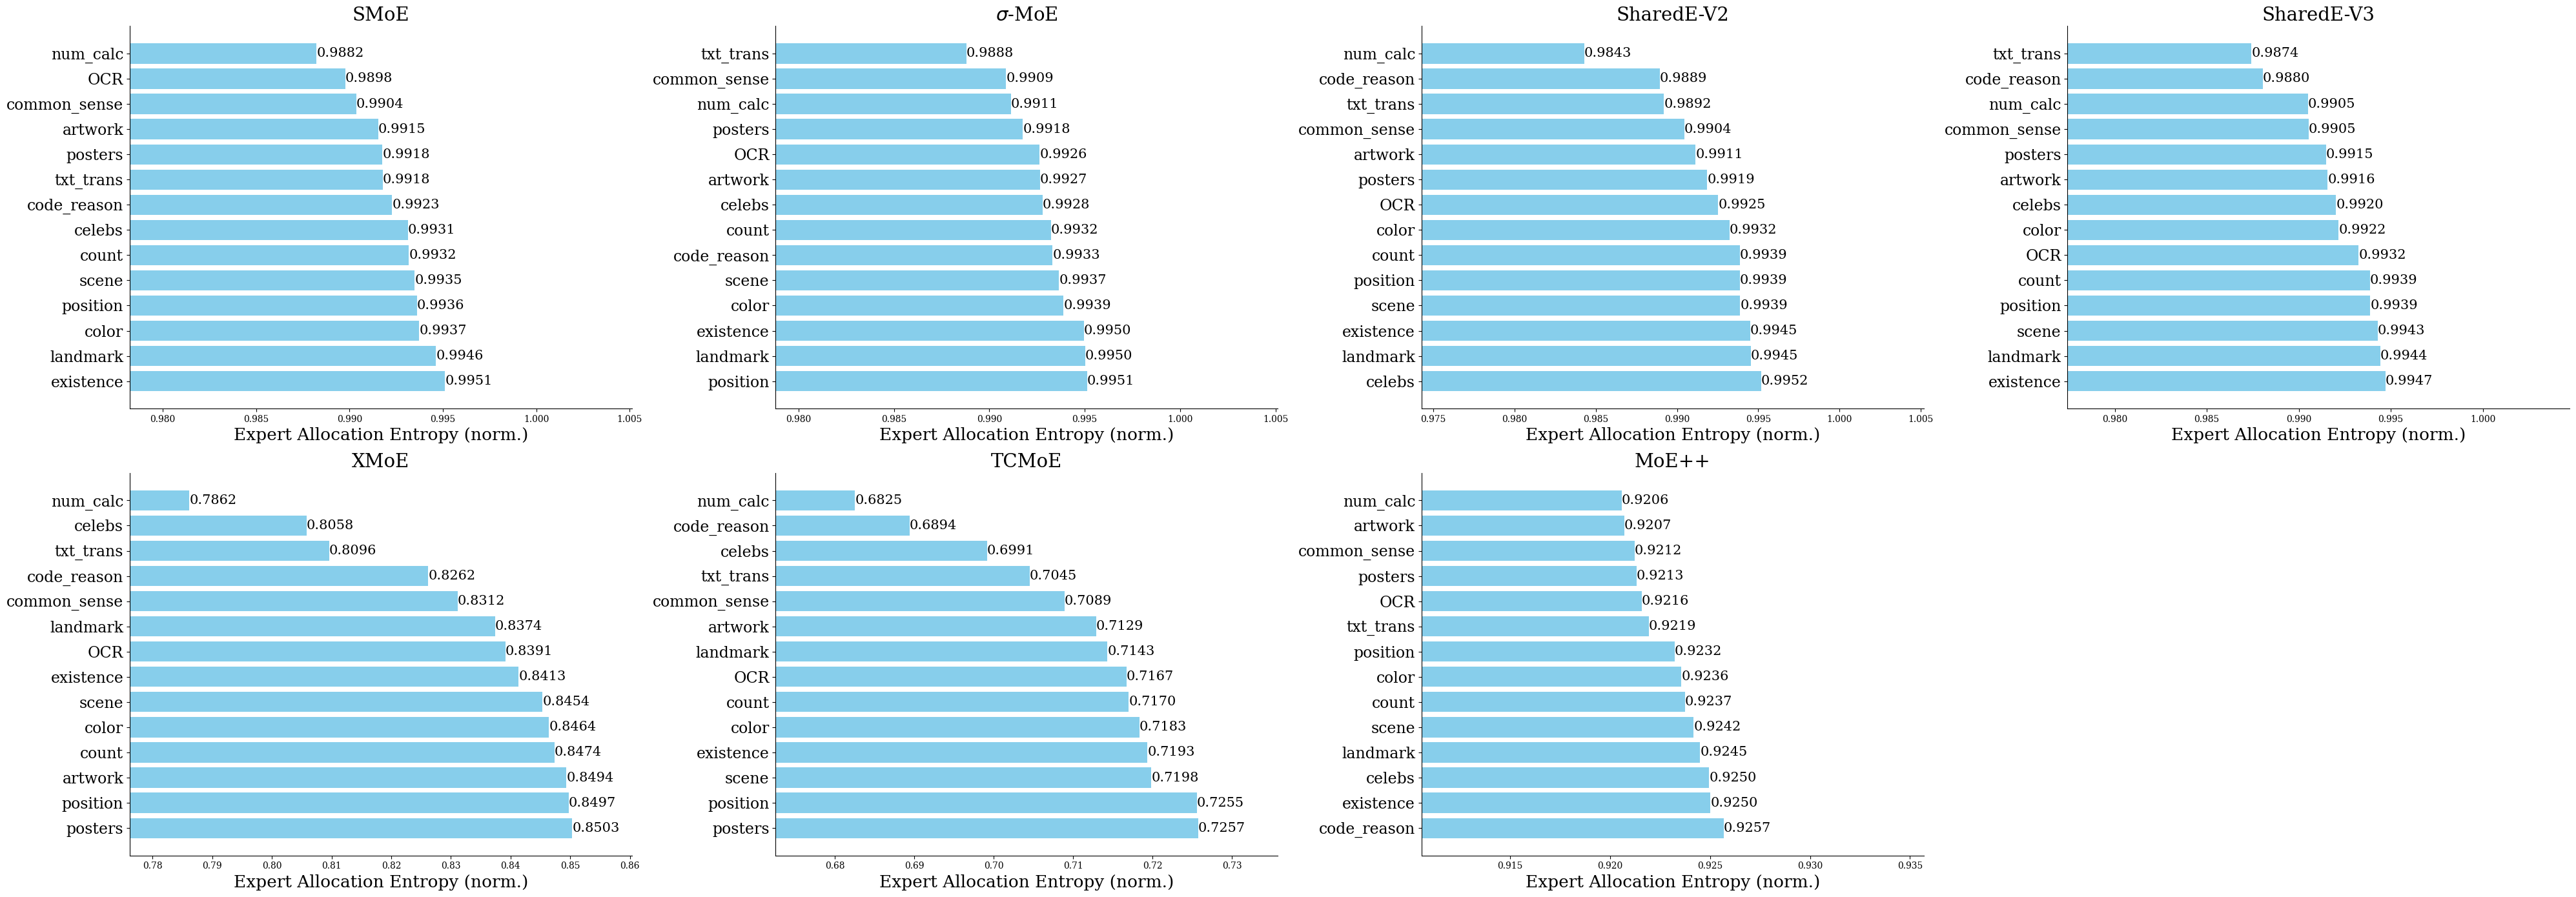

In [25]:

orders = {
    'Full_smoe': 0,
    'Full_smoe_sigmoidgating':1,
    "Full_smoe_share" : 2,
    "revise_Full_smoe_sharev3":3,
    "Full_xmoe": 4,
    "Full_smoe_tcmoe":5,
    "Full_smoe_plus_plus": 6
}
save_diff_subtask = {}
refactor_name = {
    'Full_smoe': "SMoE",
    'Full_smoe_sigmoidgating': "$\sigma$-MoE",
    "Full_smoe_share" : "SharedE-V2",
    "revise_Full_smoe_sharev3":"SharedE-V3",
    "Full_xmoe": "XMoE",
    "Full_smoe_tcmoe":'TCMoE',
    "Full_smoe_plus_plus": "MoE++"
}
# Define a dictionary to map original domain names to shortened ones
domain_abbreviations = {
    'celebrity': 'celebs',
    'code_reasoning': 'code_reason',
    'commonsense_reasoning': 'common_sense',
    'numerical_calculation': 'num_calc',
    'text_translation': 'txt_trans',
    # Các tên khác giữ nguyên
}
import math

number_method = len(data_clipsiglip["siglip"].keys())   # tổng stage (mô hình)

# -------------- VẼ --------------------------------
for model_name, score_entropy_moes in data_clipsiglip.items():
    n_rows  = 2
    n_cols  = math.ceil(number_method / 2)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(40, 14))
    axes = axes.flatten()                           # thành mảng 1D

    # Lặp qua từng stage (một stage = một router / mô hình)
    for i, (stage, scores) in enumerate(score_entropy_moes.items()):
        ax = axes[orders[stage]]

        # Chuẩn bị dữ liệu
        domains          = list(scores.keys())
        entropy_values   = list(scores.values())
        save_diff_subtask[stage] = (np.max(entropy_values) - np.min(entropy_values))*100
        print(f"{stage} = {np.max(entropy_values) - np.min(entropy_values)}")
        abbreviate       = [domain_abbreviations.get(d, d) for d in domains]
        sorted_pairs     = sorted(zip(entropy_values, abbreviate), reverse=True)
        sorted_vals, sorted_domains = zip(*sorted_pairs)

        # Bỏ khung
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)

        # Bar chart ngang
        bars = ax.barh(sorted_domains, sorted_vals, color="skyblue")
        for idx, val in enumerate(sorted_vals):
            ax.text(val, idx, f"{val:.4f}", va="center", ha="left", fontsize=fontsize-4)

        # Trục, nhãn
        ax.set_xlim(min(sorted_vals) - 0.01, max(sorted_vals) + 0.01)
        ax.set_title(refactor_name[stage], fontsize=fontsize + 2)
        ax.set_xlabel("Expert Allocation Entropy (norm.)", fontsize=fontsize)
        # if i % n_cols == 0:                         # cột đầu
        #     ax.set_ylabel("Domains", fontsize=fontsize)
        ax.set_yticklabels(sorted_domains, ha="right", fontsize=fontsize - 2)

    # Ẩn subplot thừa nếu số stage lẻ
    for j in range(i + 1, n_rows * n_cols):
        axes[j].set_visible(False)

    plt.tight_layout()
    # plt.savefig(f"./results/entropy_{model_name}.png", dpi=300)
    plt.show()

In [113]:
save_diff_subtask

{'Full_smoe_tcmoe': 4.321748524562152,
 'Full_smoe_sigmoidgating': 0.6311432809192996,
 'Full_xmoe': 6.415153418311636,
 'Full_smoe': 0.6874301086379098,
 'revise_Full_smoe_sharev3': 0.7286140463414803,
 'Full_smoe_plus_plus': 0.5105347717840103,
 'Full_smoe_share': 1.0901393301491424}

/tmp/ipykernel_3933372/1619784480.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(domains, ha="right", fontsize=fontsize - 2)
/tmp/ipykernel_3933372/1619784480.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(domains, ha="right", fontsize=fontsize - 2)
/tmp/ipykernel_3933372/1619784480.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(domains, ha="right", fontsize=fontsize - 2)
/tmp/ipykernel_3933372/1619784480.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(domains, ha="right", fontsize=fontsize - 2)


Saved entropy_row0.pdf


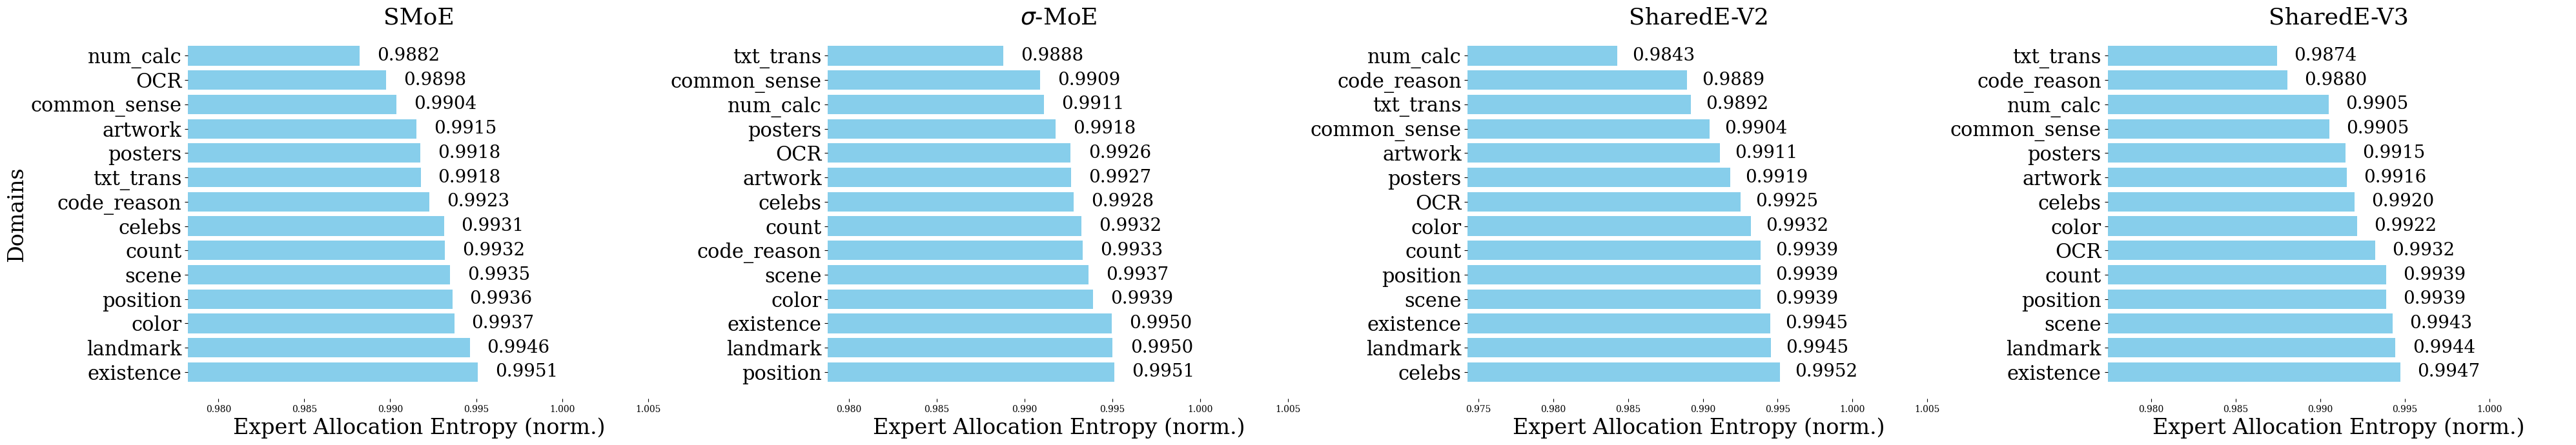

/tmp/ipykernel_3933372/1619784480.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(domains, ha="right", fontsize=fontsize - 2)
/tmp/ipykernel_3933372/1619784480.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(domains, ha="right", fontsize=fontsize - 2)
/tmp/ipykernel_3933372/1619784480.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(domains, ha="right", fontsize=fontsize - 2)


Saved entropy_row1.pdf


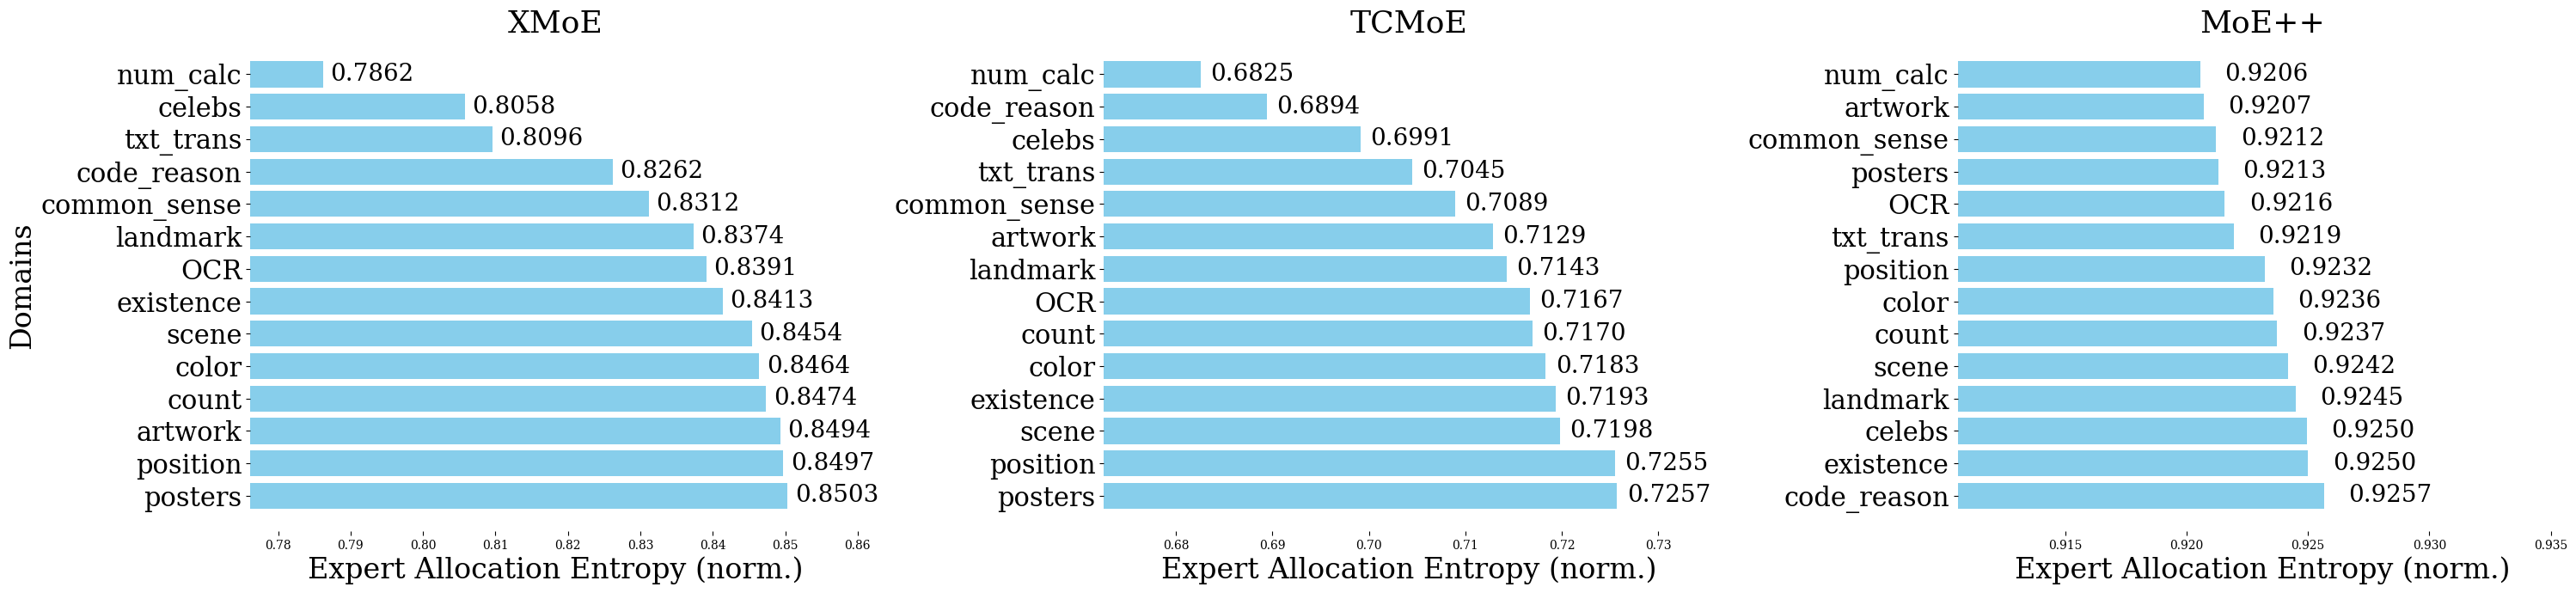

In [26]:

# ---------------- CONSTANTS ----------------
fontsize   = 24
n_rows     = 2
n_cols     = 4                      # giữ bố cục 2 × 4
figsize    = (40, 7)                # mỗi hàng cao ~7 inch
bar_color  = "skyblue"

# ---------------- DRAW ONE BARH ----------------
def draw_barh(ax, stage, scores):
    # 1. chuẩn bị & sắp xếp
    domains, vals = zip(*scores.items())
    domains = [domain_abbreviations.get(d, d) for d in domains]
    vals, domains = zip(*sorted(zip(vals, domains), reverse=True))

    # 2. thanh ngang
    ax.barh(domains, vals, color=bar_color)
    ax.set_xlim(min(vals) - .01, max(vals) + .01)

    # 3. thêm số trên đầu thanh
    for i, v in enumerate(vals):
        ax.text(v + 0.001, i, f"{v:.4f}", va="center", ha="left",
                fontsize=fontsize - 4)

    # 4. nhãn & tiêu đề
    ax.set_title(refactor_name[stage], fontsize=fontsize + 2)
    ax.set_xlabel("Expert Allocation Entropy (norm.)", fontsize=fontsize)
    ax.set_yticklabels(domains, ha="right", fontsize=fontsize - 2)

    # 5. bỏ khung và lưới
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.grid(False)

# ---------------- GROUP STAGE THEO HÀNG ----------------
row_slots = {0: [], 1: []}  # row index → list stage
for stage, idx in orders.items():
    row_slots[idx // n_cols].append(stage)

# ---------------- PLOT & SAVE EACH ROW ----------------
for row in range(n_rows):
    fig, axes = plt.subplots(1, n_cols, figsize=figsize)
    axes = axes.flatten()

    # ẩn toàn bộ ô trước
    for ax in axes:
        ax.set_visible(False)

    stages_in_row = row_slots[row]
    col_start = (n_cols - len(stages_in_row)) // 2

    for offset, stage in enumerate(stages_in_row):
        col = col_start + offset
        ax = axes[col]
        ax.set_visible(True)
        scores = data_clipsiglip["siglip"][stage]
        draw_barh(ax, stage, scores)

    # nhãn y chỉ ở ô đầu tiên
    first_axis = axes[col_start]
    first_axis.set_ylabel("Domains", fontsize=fontsize)

    plt.tight_layout()
    outfile = f"entropy_row{row}.pdf"
    fig.savefig(outfile, dpi=300, bbox_inches="tight")
    print(f"Saved {outfile}")
    plt.show()


In [ ]:
mme['logs_metrics_vision'][0][0].keys()

dict_keys(['time_inference', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', 'mm_projector'])

In [27]:
id_layers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', "mm_projector"]
entropy_data_subtasks_confi = {}
entropy_data_subtasks_confi_layers = {}

for path in data_paths:
    if not os.path.exists(f"{path}/mme.json"):
        continue

    # --- Đọc MME log ---
    with open(f"{path}/mme.json") as f:
        mme_results = json.load(f)
       # category

    # --- Đọc config để lấy tên mô hình ---
    with open(f"{path}/results.json") as f:
        result_logs = json.load(f)
    name_method = result_logs['model_configs']['model_args']\
                      .split("/")[-1].split(",")[0]

    # --- Tính entropy ---
    score_entropy = {}
    counts = {}
    for mme in mme_results['logs']:
        cag = mme['doc']['category']
        layer_scores = []

        for k in id_layers:
            score = mme['logs_metrics_vision'][0][0][k]['entropy_weight_topk']
            layer_scores.append(score)

        layer_scores = np.asarray(layer_scores)        # chuyển sang np.array

        if cag not in score_entropy:
            score_entropy[cag] = layer_scores
            counts[cag] = 0
        else:
            score_entropy[cag] += layer_scores
        counts[cag] +=1
    # --- Lưu vào dict, tránh overwrite ---
    method_dict = entropy_data_subtasks_confi.setdefault(name_method, {})
    method_dict_layers = entropy_data_subtasks_confi_layers.setdefault(name_method, {})
    for c in score_entropy.keys():
        score_entropy[c] /= counts[c]
        method_dict[c] = score_entropy[c].mean()
        method_dict_layers[c] = score_entropy[c].tolist()


In [28]:
method_dict

{'code_reasoning': 0.9561503399695669,
 'artwork': 0.9501251805786576,
 'celebrity': 0.9605347717634769,
 'numerical_calculation': 0.9651557541319303,
 'text_translation': 0.9612114558262485,
 'count': 0.9514830690054666,
 'color': 0.9521514224864188,
 'commonsense_reasoning': 0.9553910765416768,
 'position': 0.950294571547281,
 'OCR': 0.951746341479676,
 'landmark': 0.9561002497055702,
 'scene': 0.9533664422908001,
 'existence': 0.9531088357170422,
 'posters': 0.9425444772830857}

In [29]:
data_confi= {}
for moe_method in entropy_data_subtasks_confi.keys():
    data_confi[moe_method] = {}
    for subtask in entropy_data_subtasks_confi[moe_method].keys():
        data_confi[moe_method][subtask] = np.mean(entropy_data_subtasks_confi[moe_method][subtask])

In [31]:
subtasks = [
    'code_reasoning', 'artwork', 'celebrity', 'numerical_calculation',
    'text_translation', 'count', 'color', 'commonsense_reasoning',
    'position', 'OCR', 'landmark', 'scene', 'existence', 'posters'
]

# Define groups based on the categories seen in the image
subtask_groups = {
    "Perception (Coarse-Grained Tasks)": [
        "existence", "count", "position", "color"
    ],
    "Perception (Fine-Grained Tasks)": [
        "posters", "celebrity", "scene", "landmark", "artwork"
    ],
    "Perception (OCR Task)": [
        "OCR"
    ],
    "Cognition (Reasoning Tasks)": [
        "commonsense_reasoning", "numerical_calculation", "text_translation", "code_reasoning"
    ]
}

# Display the groups
for category, subtasks_in_group in subtask_groups.items():
    print(f"{category}: {subtasks_in_group}")


Perception (Coarse-Grained Tasks): ['existence', 'count', 'position', 'color']
Perception (Fine-Grained Tasks): ['posters', 'celebrity', 'scene', 'landmark', 'artwork']
Perception (OCR Task): ['OCR']
Cognition (Reasoning Tasks): ['commonsense_reasoning', 'numerical_calculation', 'text_translation', 'code_reasoning']


- Phải đưa ra 2 kết luận
    - XMoE weights có xu hướng cân bằng hơn 
    - Các tasks đòi hỏi sự reasoning thì có entropy cao hơn so với các task còn lại

In [32]:
import matplotlib.pyplot as plt

# Define task group mappings
task_groups = {
    "Coarse-Grained": ["existence", "count", "position", "color"],
    "Fine-Grained": ["posters", "celebrity", "scene", "landmark", "artwork"],
    "OCR": ["OCR"],
    "Reasoning": ["commonsense_reasoning", "numerical_calculation", "text_translation", "code_reasoning"]
}

# Dictionary to map original domain names to shortened ones
domain_abbreviations = {
    'celebrity': 'celebs',
    'code_reasoning': 'code_reason',
    'commonsense_reasoning': 'common_sense',
    'numerical_calculation': 'num_calc',
    'text_translation': 'txt_trans',
}

# Data
score_entropy_moes = data_confi
stage_order = [x for x in orders.keys()]



/tmp/ipykernel_3933372/2030216746.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(tasks, ha="right", fontsize=fontsize-2)
/tmp/ipykernel_3933372/2030216746.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(tasks, ha="right", fontsize=fontsize-2)
/tmp/ipykernel_3933372/2030216746.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(tasks, ha="right", fontsize=fontsize-2)
/tmp/ipykernel_3933372/2030216746.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(tasks, ha="right", fontsize=fontsize-2)
/tmp/ipykernel_3933372/2030216746.py:63: UserWarning: set_ticklabels() should on

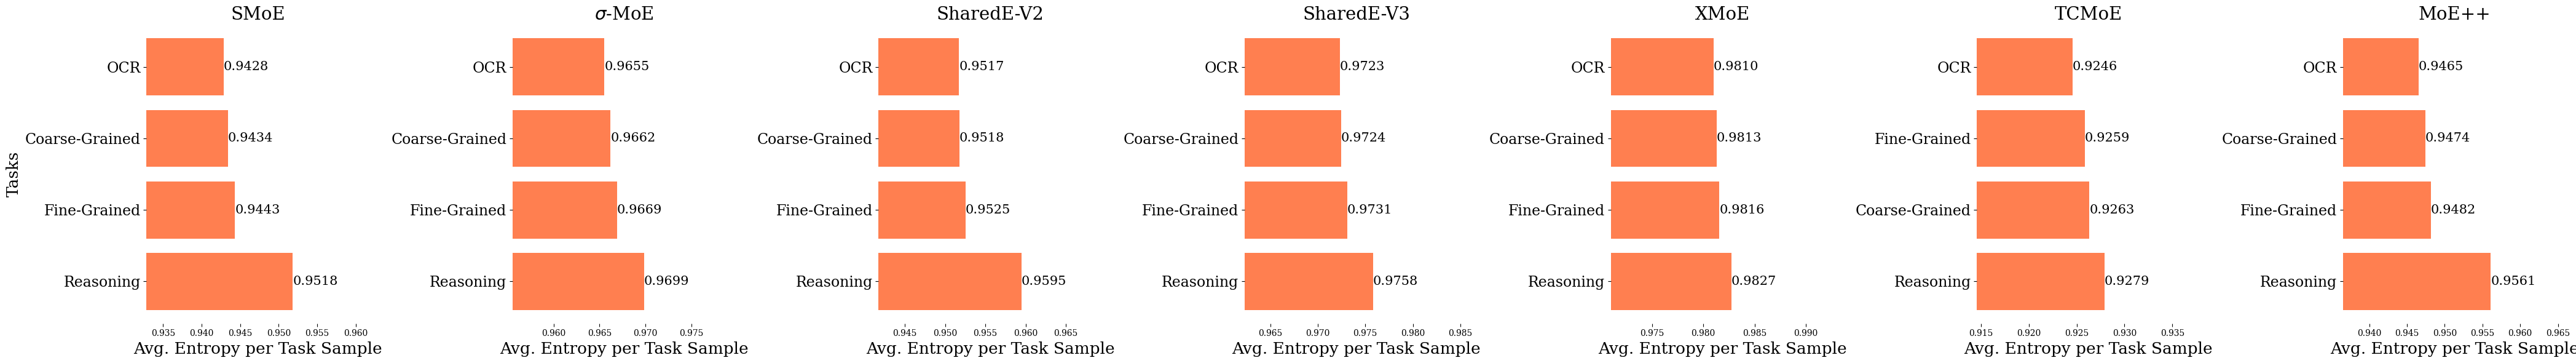

Saved entropy_tasks_all_stages.pdf


In [33]:
import math
import matplotlib.pyplot as plt

# ------------ CONFIG -------------
fontsize   = 19
bar_color  = "coral"

# stage_order, refactor_name, task_groups, domain_abbreviations,
# score_entropy_moes (data_confi) phải có sẵn trước đó
stage_order  = list(orders.keys())           # bao nhiêu stage cũng được
n_stage      = len(stage_order)              # dùng cho layout

# --------- TÍNH ENTROPY THEO GROUP ---------
grouped_entropy_scores = {}
for stage in stage_order:
    grouped_entropy_scores[stage] = {}
    scores = score_entropy_moes.get(stage, {})  # domain → entropy

    for task, subtasks in task_groups.items():
        vals = [scores.get(d, 0) for d in subtasks]
        if vals:                                 # có ít nhất 1 sub‑task
            avg = sum(vals) / len(vals)
            adj = ((avg - 1.999) * 10_000        # scale * chỉ áp cho 2 router đặc biệt
                    if stage in {"smoe_cosinegating", "smoe_perturbed"}
                    else avg)
            grouped_entropy_scores[stage][task] = (avg, adj)

# ---------- GRID: 1 ROW × n_stage COLUMNS ----------
fig_width  = 6 * n_stage                       # 6 inch mỗi ô ngang
fig_height = 6
fig, axes  = plt.subplots(1, n_stage, figsize=(fig_width, fig_height))
axes       = axes.flatten()                    # bảo đảm iterable

for col, stage in enumerate(stage_order):
    ax    = axes[col]
    scores = grouped_entropy_scores[stage]

    tasks         = list(scores.keys())
    ent_plot_vals = [v[1] for v in scores.values()]  # giá trị đã scale (plot)
    ent_orig_vals = [v[0] for v in scores.values()]  # giá trị gốc (hiển thị)

    # sắp giảm dần để nhìn trực quan
    ent_plot_vals, ent_orig_vals, tasks = zip(*
        sorted(zip(ent_plot_vals, ent_orig_vals, tasks), reverse=True))

    # --- VẼ ---
    ax.barh(tasks, ent_plot_vals, color=bar_color)

    # số trên thanh (giá trị gốc)
    for i, v in enumerate(ent_orig_vals):
        ax.text(ent_plot_vals[i], i, f"{v:.4f}", ha="left", va="center",
                fontsize=fontsize-4)

    # nhãn & trục
    ax.set_xlim(min(ent_plot_vals) - .01, max(ent_plot_vals) + .01)
    ax.set_title(refactor_name.get(stage, stage), fontsize=fontsize+2)
    xlabel = "Avg. Entropy per Task Sample"
    if stage in {"smoe_cosinegating", "smoe_perturbed"}:
        xlabel += " *"  # ký hiệu scale *
    ax.set_xlabel(xlabel, fontsize=fontsize)
    if col == 0:
        ax.set_ylabel("Tasks", fontsize=fontsize)
    ax.set_yticklabels(tasks, ha="right", fontsize=fontsize-2)

    # bỏ toàn bộ khung
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.tight_layout()
fig.savefig("entropy_tasks_all_stages.pdf", dpi=300, bbox_inches="tight")
plt.show()
print("Saved entropy_tasks_all_stages.pdf")


['Full_smoe', 'Full_smoe_sigmoidgating', 'Full_smoe_share', 'revise_Full_smoe_sharev3', 'Full_xmoe', 'Full_smoe_tcmoe', 'Full_smoe_plus_plus']
['Full_smoe', 'Full_smoe_sigmoidgating', 'Full_smoe_share', 'revise_Full_smoe_sharev3', 'Full_xmoe', 'Full_smoe_tcmoe', 'Full_smoe_plus_plus']
['Full_smoe', 'Full_smoe_sigmoidgating', 'Full_smoe_share', 'revise_Full_smoe_sharev3', 'Full_xmoe', 'Full_smoe_tcmoe', 'Full_smoe_plus_plus']
['Full_smoe', 'Full_smoe_sigmoidgating', 'Full_smoe_share', 'revise_Full_smoe_sharev3', 'Full_xmoe', 'Full_smoe_tcmoe', 'Full_smoe_plus_plus']


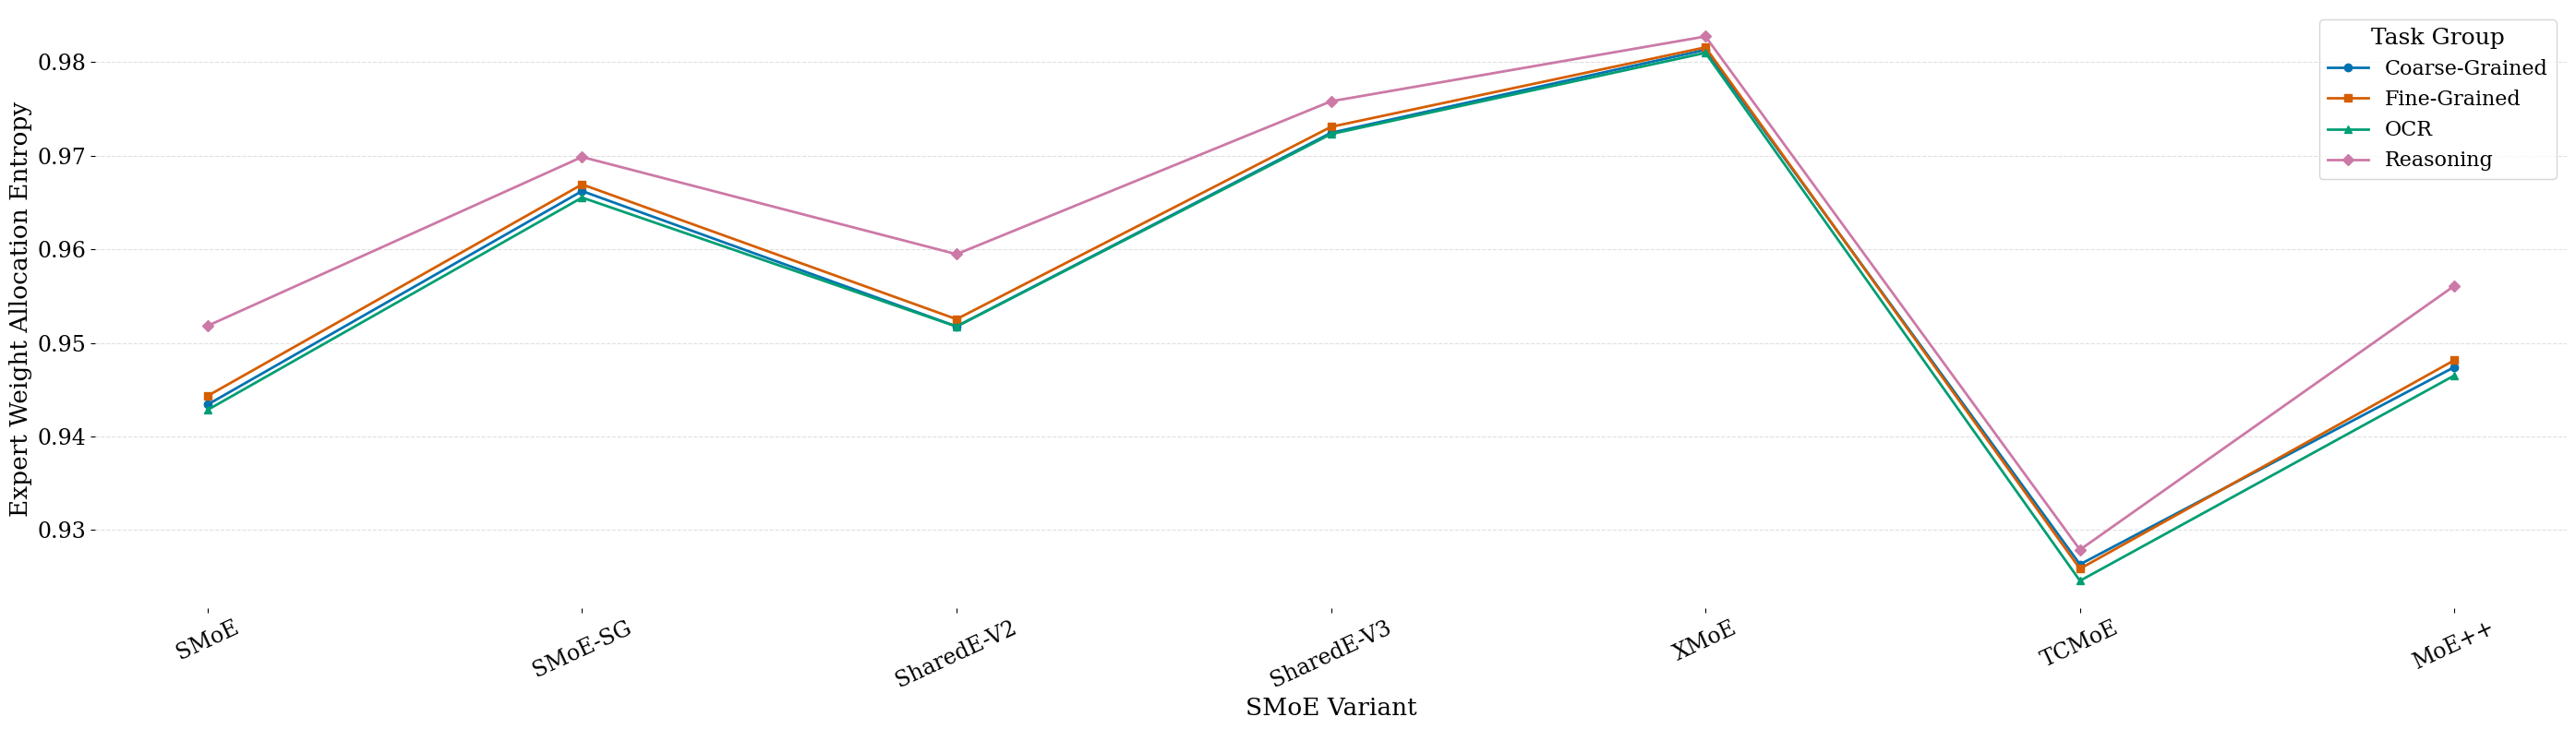

Saved entropy_taskgroup_lines.pdf


In [31]:
import matplotlib.pyplot as plt
import numpy as np

# ================ CONFIG =================
fontsize   = 19
colors     = ["#0072B2", "#D55E00", "#009E73", "#CC79A7", "#E69F00"]
marker_set = ["o", "s", "^", "D", "P"]

# ---- dữ liệu tiền xử lý sẵn ----
# * stage_order            : list tên router (x‑axis)
# * task_groups            : dict {TaskGroup: [sub‑tasks]}
# * score_entropy_moes     : dict {stage: {domain: entropy}}
# ------------------------------------------------------

# 1) Gom giá trị trung bình theo Task Group cho từng stage
plot_dict = {tg: [] for tg in task_groups}        # tg → [val per stage]
for stage in stage_order:
    scores = score_entropy_moes.get(stage, {})    # domain → entropy
    for tg, subs in task_groups.items():
        vals = [scores.get(s, 0) for s in subs]
        plot_dict[tg].append(np.mean(vals) if vals else 0)

# 2) Vẽ line plot ------------------------------------------------
fig, ax = plt.subplots(figsize=(4 * len(stage_order), 8))

for idx, (tg, serie) in enumerate(plot_dict.items()):
    print(stage_order)
    ax.plot([refactor_name[stage] for stage in stage_order], serie,
            color=colors[idx % len(colors)],
            marker=marker_set[idx % len(marker_set)],
            linewidth=2, label=tg)

# 3) Trang trí ---------------------------------------------------
ax.set_xlabel("SMoE Variant", fontsize=fontsize)
ax.set_ylabel("Expert Weight Allocation Entropy", fontsize=fontsize)
# ax.set_title("Entropy across Task Groups", fontsize=fontsize + 2)
ax.tick_params(axis='x', rotation=25, labelsize=fontsize - 2)
ax.tick_params(axis='y', labelsize=fontsize - 2)

# Bỏ khung
for spine in ax.spines.values():
    spine.set_visible(False)

ax.legend(title="Task Group", fontsize=fontsize - 3, title_fontsize=fontsize - 1)
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
fig.savefig("Expert_Weight_Allocation_Entropy.pdf", dpi=300, bbox_inches="tight")
plt.show()
print("Saved entropy_taskgroup_lines.pdf")

In [35]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


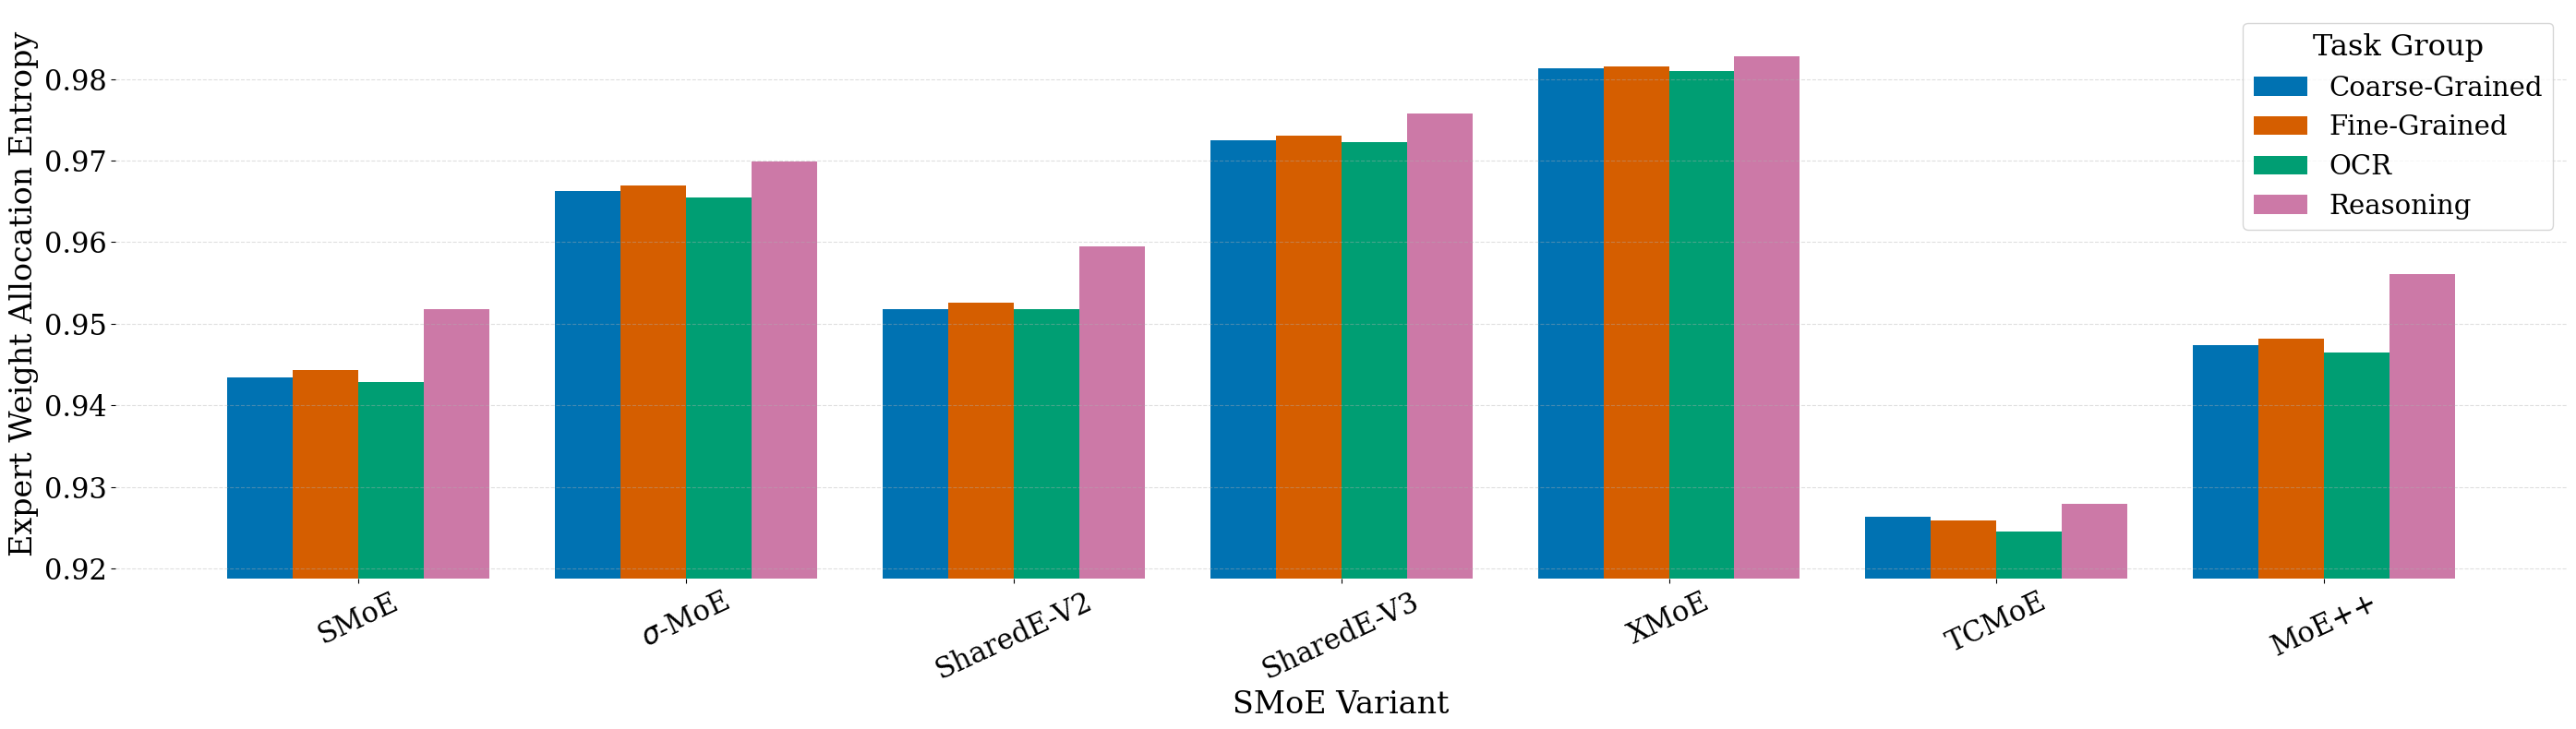

Saved Expert_Weight_Allocation_Entropy_Bars.pdf


In [34]:


fontsize   = 24
colors     = ["#0072B2", "#D55E00", "#009E73", "#CC79A7", "#E69F00"]
marker_set = ["o", "s", "^", "D", "P"]

# ---- dữ liệu tiền xử lý sẵn ----
# * stage_order            : list tên router (x‑axis)
# * task_groups            : dict {TaskGroup: [sub‑tasks]}
# * score_entropy_moes     : dict {stage: {domain: entropy}}
# * refactor_name          : dict tên viết tắt gọn của mỗi stage

# 1) Gom giá trị trung bình theo Task Group cho từng stage
plot_dict = {tg: [] for tg in task_groups}  # tg → [val per stage]
for stage in stage_order:
    scores = score_entropy_moes.get(stage, {})  # domain → entropy
    for tg, subs in task_groups.items():
        vals = [scores.get(s, 0) for s in subs]
        plot_dict[tg].append(np.mean(vals) if vals else 0)

# 2) Vẽ biểu đồ cột
fig, ax = plt.subplots(figsize=(4 * len(stage_order), 8))

n_tg = len(task_groups)
bar_width = 0.8 / n_tg
x = np.arange(len(stage_order))  # vị trí từng stage

for idx, (tg, serie) in enumerate(plot_dict.items()):
    bar_pos = x + idx * bar_width - (n_tg - 1) * bar_width / 2
    ax.bar(bar_pos, serie,
           width=bar_width,
           color=colors[idx % len(colors)],
           label=tg)

# 3) Trang trí
ax.set_xticks(x)
ax.set_xticklabels([refactor_name[stage] for stage in stage_order],
                   rotation=25, fontsize=fontsize - 2)

ax.set_xlabel("SMoE Variant", fontsize=fontsize)
ax.set_ylabel("Expert Weight Allocation Entropy", fontsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize - 2)

# Bỏ khung viền
for spine in ax.spines.values():
    spine.set_visible(False)

# 🌟 Zoom y-axis nếu sự khác biệt nhỏ
all_vals = sum(plot_dict.values(), [])
min_y = min(all_vals)
max_y = max(all_vals)
pad = (max_y - min_y) * 0.1
ax.set_ylim(min_y - pad, max_y + pad)

# ⚡ Chỉ giữ đường ngang (nét đứt), bỏ đường dọc
ax.grid(axis='both', linestyle='--', alpha=0.4)
ax.grid(axis='x', visible=False)

# Legend
ax.legend(title="Task Group", fontsize=fontsize - 3, title_fontsize=fontsize - 1)

# Lưu và hiển thị
plt.tight_layout()
fig.savefig("Expert_Weight_Allocation_Entropy.pdf", dpi=300, bbox_inches="tight")
plt.show()

print("Saved Expert_Weight_Allocation_Entropy_Bars.pdf")


In [195]:
entropy_each_layers = {}
for name_method in entropy_data_subtasks_confi_layers.keys():
    print(entropy_data_subtasks_confi_layers[name_method].keys())
    for subtask, value in entropy_data_subtasks_confi_layers[name_method].items():
        if name_method not in entropy_each_layers:
            entropy_each_layers[name_method] = np.array(value[:-1])
        else:
            # print(subtask)
            # print(subtask.value)
            # print(entropy_each_layers[name_method])
            entropy_each_layers[name_method] += np.array(value[:-1])
    entropy_each_layers[name_method]/= len(entropy_data_subtasks_confi_layers[name_method])
    entropy_each_layers[name_method] = entropy_each_layers[name_method].tolist()

dict_keys(['code_reasoning', 'artwork', 'celebrity', 'numerical_calculation', 'text_translation', 'count', 'color', 'commonsense_reasoning', 'position', 'OCR', 'landmark', 'scene', 'existence', 'posters'])
dict_keys(['code_reasoning', 'artwork', 'celebrity', 'numerical_calculation', 'text_translation', 'count', 'color', 'commonsense_reasoning', 'position', 'OCR', 'landmark', 'scene', 'existence', 'posters'])
dict_keys(['code_reasoning', 'artwork', 'celebrity', 'numerical_calculation', 'text_translation', 'count', 'color', 'commonsense_reasoning', 'position', 'OCR', 'landmark', 'scene', 'existence', 'posters'])
dict_keys(['code_reasoning', 'artwork', 'celebrity', 'numerical_calculation', 'text_translation', 'count', 'color', 'commonsense_reasoning', 'position', 'OCR', 'landmark', 'scene', 'existence', 'posters'])
dict_keys(['code_reasoning', 'artwork', 'celebrity', 'numerical_calculation', 'text_translation', 'count', 'color', 'commonsense_reasoning', 'position', 'OCR', 'landmark', 'sce

In [196]:
entropy_each_layers

{'Full_smoe_tcmoe': [0.9848937951473175,
  0.9865931044556173,
  0.9859431124739154,
  0.9866361835830473,
  0.9810133712288003,
  0.9865911374307259,
  0.9819188153712355,
  0.9824928388834421,
  0.9805734426846845,
  0.9823275189180064,
  0.9827540689593766,
  0.98040276863793,
  0.9823081507822348,
  0.9794345987096614,
  0.9754240652035674,
  0.9729213820033823,
  0.966286144202411,
  0.954676080146944,
  0.9273378156957277,
  0.8846485558895852,
  0.8397471458098018,
  0.7628612893763587,
  0.7739400478802165,
  0.7677111357098081,
  0.7562000201653671,
  0.7419883585652128,
  0.9546208597047613],
 'Full_smoe_sigmoidgating': [0.998910994085134,
  0.9980773500108749,
  0.9966230772442906,
  0.9958893788402637,
  0.9943536618749061,
  0.9946945708389381,
  0.9922752893707705,
  0.9927977249074854,
  0.9928851387792843,
  0.9926301858634078,
  0.9922819960852645,
  0.9922878653414491,
  0.9905636296789923,
  0.9896862915785734,
  0.9903216572622354,
  0.9871544517639645,
  0.98303357

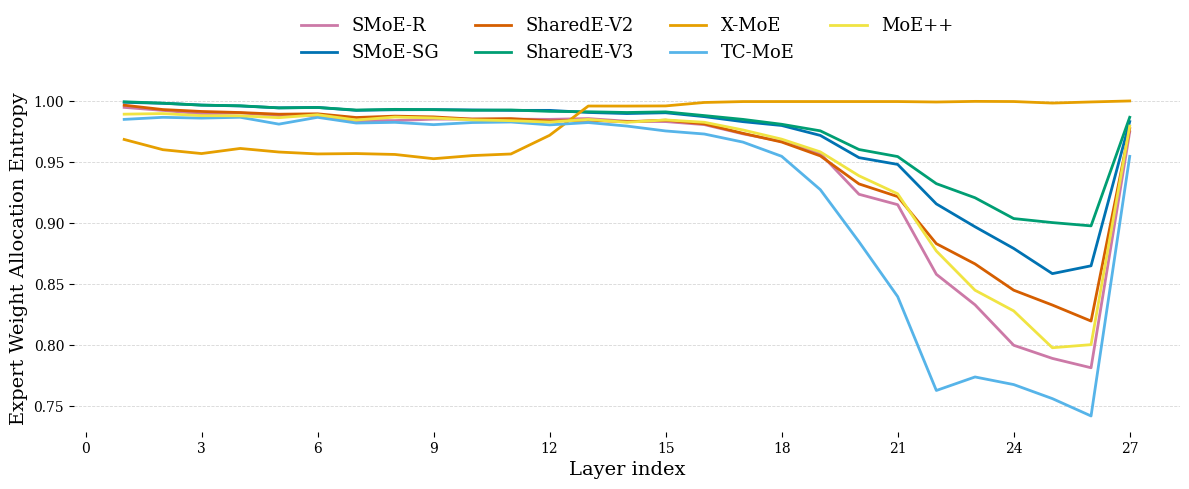

Saved entropy_line_all_methods.pdf


In [213]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- SETTINGS ----------
method_name = {
    "Full_smoe":               "SMoE-R",
    "Full_smoe_sigmoidgating": "SMoE-SG",
    "Full_smoe_share":         "SharedE-V2",
    "revise_Full_smoe_sharev3":"SharedE-V3",
    "Full_xmoe":               "X-MoE",
    "Full_smoe_tcmoe":         "TC-MoE",
    "Full_smoe_plus_plus":     "MoE++"
}
method_order = list(method_name.keys())

palette = ["#CC79A7", "#0072B2", "#D55E00", "#009E73",
           "#E69F00", "#56B4E9", "#F0E442"]

plt.rcParams["font.family"] = "DejaVu Serif"
fontsize = 14

# ---------- PLOT ----------
fig, ax = plt.subplots(figsize=(12, 5))

x = np.arange(1, 28)                      # 1..27
for col, m in zip(palette, method_order):
    y = entropy_each_layers[m]            # <-- list/ndarray length 27
    ax.plot(x, y, lw=2, label=method_name[m], color=col)

ax.set_xlabel("Layer index", fontsize=fontsize)
ax.set_ylabel("Expert Weight Allocation Entropy", fontsize=fontsize)
ax.yaxis.grid(True, which="major", linestyle="--",
              linewidth=0.6, alpha=0.5)

# ---- legend at top, single row ----
ax.legend(ncol=4, loc="lower center",
          bbox_to_anchor=(0.5, 1.02), frameon=False,
          fontsize=fontsize-1)

# ---- remove ALL spines ----
for spine in ax.spines.values():
    spine.set_visible(False)

ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.savefig("Expert_Weight_Allocation_Entropy_Layers.pdf", dpi=300, bbox_inches="tight")
plt.show()
print("Saved entropy_line_all_methods.pdf")


In [185]:
entropy_dist_experts = entropy_data_subtasks_clip_siglip['siglip']
entropy_dist_each_layers = {}
for name_method in entropy_dist_experts.keys():
    print(entropy_dist_experts[name_method].keys())
    for subtask, value in entropy_dist_experts[name_method].items():
        if name_method not in entropy_dist_each_layers:
            entropy_dist_each_layers[name_method] = np.array(value)
        else:
            # print(subtask)
            # print(subtask.value)
            # print(entropy_dist_each_layers[name_method])
            entropy_dist_each_layers[name_method] += np.array(value)
    entropy_dist_each_layers[name_method]/= len(entropy_dist_experts[name_method])
    entropy_dist_each_layers[name_method] = entropy_dist_each_layers[name_method].tolist()

dict_keys(['code_reasoning', 'artwork', 'celebrity', 'numerical_calculation', 'text_translation', 'count', 'color', 'commonsense_reasoning', 'position', 'OCR', 'landmark', 'scene', 'existence', 'posters'])
dict_keys(['code_reasoning', 'artwork', 'celebrity', 'numerical_calculation', 'text_translation', 'count', 'color', 'commonsense_reasoning', 'position', 'OCR', 'landmark', 'scene', 'existence', 'posters'])
dict_keys(['code_reasoning', 'artwork', 'celebrity', 'numerical_calculation', 'text_translation', 'count', 'color', 'commonsense_reasoning', 'position', 'OCR', 'landmark', 'scene', 'existence', 'posters'])
dict_keys(['code_reasoning', 'artwork', 'celebrity', 'numerical_calculation', 'text_translation', 'count', 'color', 'commonsense_reasoning', 'position', 'OCR', 'landmark', 'scene', 'existence', 'posters'])
dict_keys(['code_reasoning', 'artwork', 'celebrity', 'numerical_calculation', 'text_translation', 'count', 'color', 'commonsense_reasoning', 'position', 'OCR', 'landmark', 'sce

In [186]:
entropy_dist_each_layers

{'Full_smoe_tcmoe': [0.5270434512164968,
  0.5848676247536486,
  0.6185834958599592,
  0.6437342551767478,
  0.6101411052201021,
  0.6182900242776578,
  0.6372610939007479,
  0.6389077296970156,
  0.6260825451703055,
  0.6359632784077158,
  0.6402287446152691,
  0.643967077191732,
  0.6448425283653422,
  0.6424447257679473,
  0.6447166837761413,
  0.6644897126627557,
  0.6573471756640833,
  0.6717614580194953,
  0.7340655313237632,
  0.7463414627052253,
  0.7571769965114512,
  0.7267175780947188,
  0.7378483061328691,
  0.6515835227906964,
  0.6530542139343672,
  0.6498910828909025,
  0.7721311906729388],
 'Full_smoe_sigmoidgating': [0.8947734425143804,
  0.9333499148312365,
  0.9778886377801977,
  0.9752218394664235,
  0.9640953686039716,
  0.980331943148977,
  0.9805853721412877,
  0.9798382502025936,
  0.9831245769871471,
  0.985077510700546,
  0.9779290680868123,
  0.9807146790095557,
  0.9840242317392429,
  0.9809085814171944,
  0.9865532511387745,
  0.9863663726405237,
  0.989820

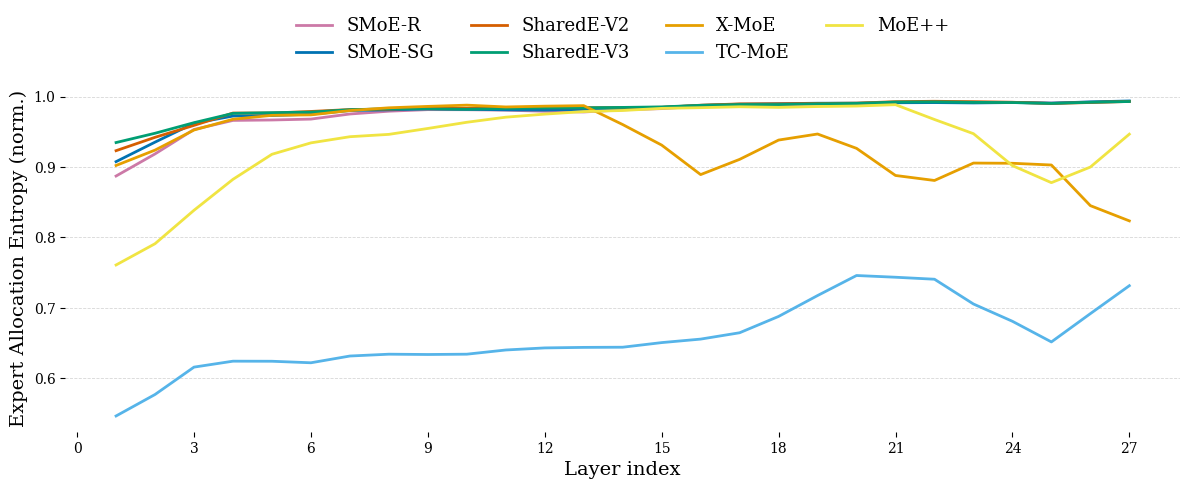

Saved entropy_line_all_methods.pdf


In [212]:
import numpy as np
import matplotlib.pyplot as plt

# ===== CONFIG ==================================================
smooth = True   # False → không làm mượt
win    = 3      # chiều rộng cửa sổ moving-average

# Palette Okabe–Ito (7 màu) & thứ tự mô hình đã có:
# palette, method_order, method_name, entropy_dist_each_layers

# ===== HÀM LÀM MƯỢT ============================================
def moving_avg(arr, k=3):
    if k <= 1:
        return arr
    pad = k // 2
    padded = np.concatenate(([arr[0]] * pad, arr, [arr[-1]] * pad))
    kernel = np.ones(k) / k
    return np.convolve(padded, kernel, mode="valid")

# ===== VẼ ĐỒ THỊ ==============================================
plt.rcParams["font.family"] = "DejaVu Serif"
fontsize = 14
fig, ax  = plt.subplots(figsize=(12, 5))

x = np.arange(1, 28)            # layer index 1..27
for color, m in zip(palette, method_order):
    y_raw = np.array(entropy_dist_each_layers[m])
    y     = moving_avg(y_raw, win) if smooth else y_raw
    ax.plot(x, y, lw=2, label=method_name[m], color=color)

# ---- Nhãn / tiêu đề ----
ax.set_xlabel("Layer index", fontsize=fontsize)
ax.set_ylabel("Expert Allocation Entropy (norm.)", fontsize=fontsize)
ax.yaxis.grid(True, which="major", linestyle="--",
              linewidth=0.6, alpha=0.5)
# suffix = f"(moving-avg k={win})" if smooth else ""
# ax.set_title(f"Entropy per layer for MoE variants {suffix}",
#              fontsize=fontsize+2)

# ---- Legend ở TRÊN, một hàng ----
ax.legend(ncol=4, loc="lower center",
          bbox_to_anchor=(0.5, 1.02), frameon=False,
          fontsize=fontsize-1)

# ---- Xử lý trục & khung ----
for spine in ax.spines.values():      # bỏ toàn bộ viền (đen)
    spine.set_visible(False)

ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.savefig("Expert_Allocation_Entropy_Layers.pdf", dpi=300, bbox_inches="tight")
plt.show()
print("Saved entropy_line_all_methods.pdf")
